# 1. EDA techniques

#### Import things

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [4]:
df = pd.read_excel('youtube_comments.xlsx')

#### Show the first few rows of the dataset

In [5]:
df.head() # head used to represent first few data of a long dataset

,ID,Text,Label
0,@Islami932,শিবির একটি আদর্শ সংগঠন,1
1,@sumonaakther4303,জামাত বেস্ট,1
2,@HabibHujut,ইসলামী ছাত্রশিবির জিন্দাবাদ ❤️☝️,1
3,@mdsujan9311,ছাত্রশিবিরের সভাপতি এটা গর্ব করার কোন দরকার ছি...,1
4,@KadijaKadija-e2m,❤,1


#### Check for missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2258 non-null   object
 1   Text    2258 non-null   object
 2   Label   2258 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 53.1+ KB


#### Check for duplicate values

In [7]:
print("Number of duplicate values are : ", df.duplicated().sum())

Number of duplicate values are :  9


#### Descriptive statistics

In [8]:
df.describe()

,Label
count,2258.000000
mean,0.880425
std,0.478938
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


#### Plotting label distribution


C:\Users\MSI\AppData\Local\Temp\ipykernel_17400\4031627842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Label'], palette="Set2")


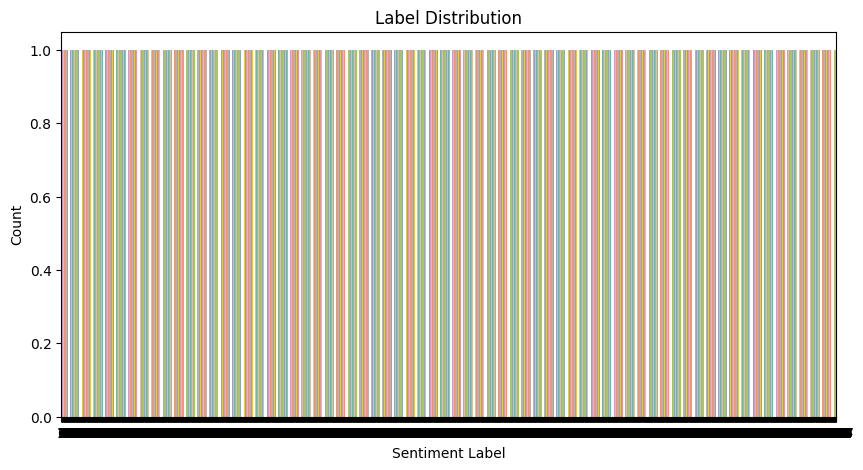

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(df['Label'], palette="Set2")
plt.title('Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

#### Adding a column for comment lengths

In [10]:
df['Text_length'] = df['Text'].apply(len)
print(df['Text_length'])

0        22
1        11
2        32
3       241
4         1
       ... 
2253     14
2254     56
2255     38
2256     38
2257      9
Name: Text_length, Length: 2258, dtype: int64


#### Plotting the distribution of comment lengths

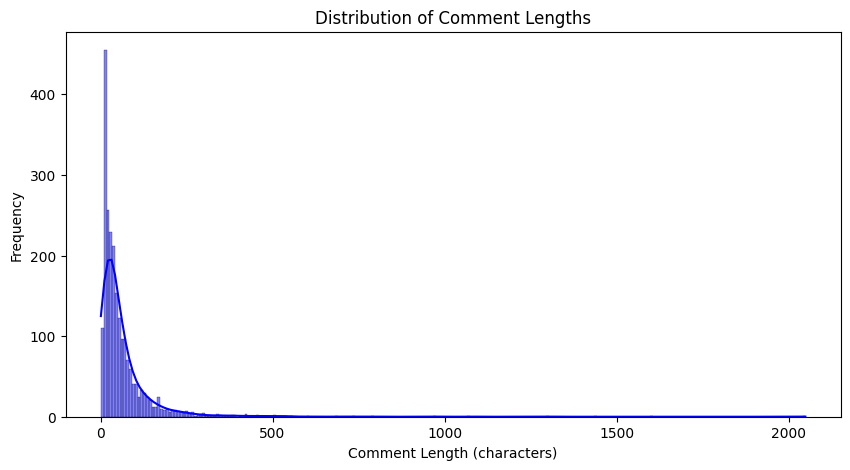

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['Text_length'], kde=True, color='blue')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length (characters)') # length of each comment in characters.
plt.ylabel('Frequency') # how often each comment length occurs in the dataset.
plt.show() # Kichhu comments beshi ache (Alhamdulillah), kichu comments ekebarei nai

#### Plot word count distribution

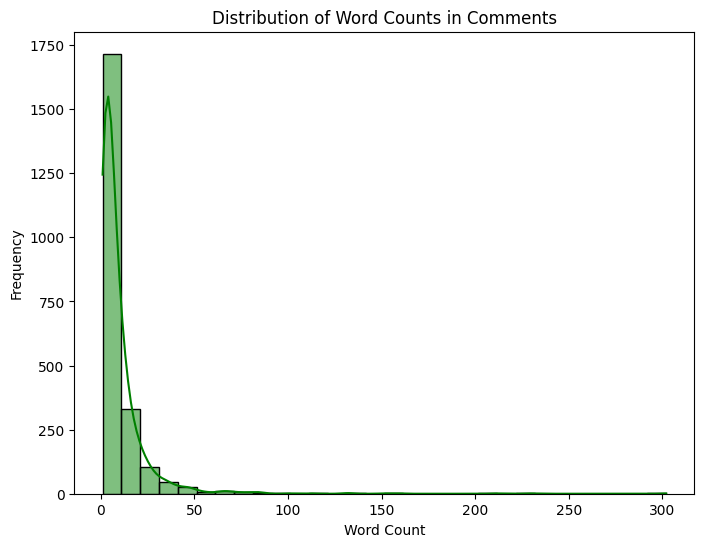

In [12]:
df['word_count'] = df['Text'].apply(lambda x: len(x.split())) 

# lambda x: len(x.split()) : This is a lambda function that takes each comment (as x), splits it into a list of words using the .split() method, and then counts the length of that list using len().

plt.figure(figsize=(8,6))
sns.histplot(df['word_count'], bins=30, color='green', kde=True)
plt.title('Distribution of Word Counts in Comments')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show() # dekha jacche 0-5 ta words wala sentence e beshi, and 100 length er gula nai e almost


# 2. Cleaning Techniques

#### Import things

In [13]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Function to clean text

In [14]:
def clean_text(text):
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)  # Keep only Bangla characters and whitespace
    tokens = word_tokenize(text) # Tokenize text
    stop_words = set(stopwords.words('bengali')) # Remove stop words
    tokens = [word for word in tokens if word not in stop_words and word.strip() != '']
    return ' '.join(tokens)
df['Cleaned_Text'] = df['Text'].apply(clean_text)

#### Preview cleaned text

In [15]:
df[['Text', 'Cleaned_Text']].head()

,Text,Cleaned_Text
0,শিবির একটি আদর্শ সংগঠন,শিবির আদর্শ সংগঠন
1,জামাত বেস্ট,জামাত বেস্ট
2,ইসলামী ছাত্রশিবির জিন্দাবাদ ❤️☝️,ইসলামী ছাত্রশিবির জিন্দাবাদ
3,ছাত্রশিবিরের সভাপতি এটা গর্ব করার কোন দরকার ছি...,ছাত্রশিবিরের সভাপতি গর্ব দরকার দরকার এক দফা এক...
4,❤,


# 3. Word cloud visualization 

#### Import things

In [16]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

#### Bangla font

In [17]:
bangla_font_path = 'kalpurush.ttf'

#### Generate a word cloud

In [18]:
text_data = ' '.join(df['Cleaned_Text'])
rgx = r"[\u0980-\u09FF]+"
wordcloud = WordCloud(font_path=bangla_font_path, 
regexp=rgx).generate(text_data)

#### Plot the word cloud

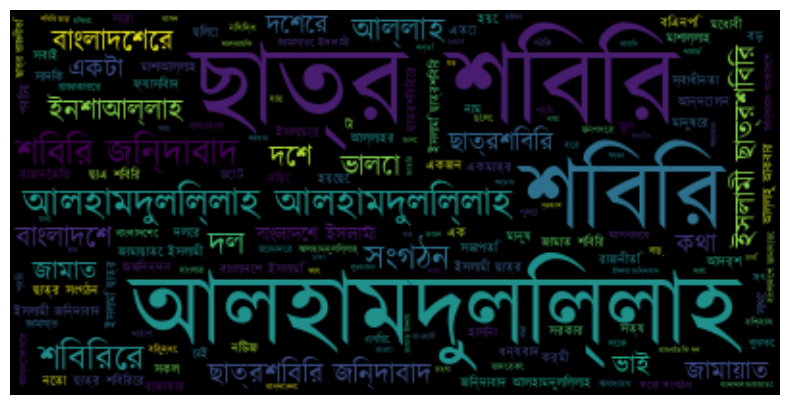

In [19]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

# 4. Visualize most frequent words 

#### Find common words

In [20]:
from collections import Counter
from matplotlib import font_manager

all_words = ' '.join(df['Cleaned_Text']).split()
word_counts = Counter(all_words)

common_words = word_counts.most_common(20)
print(common_words)

[('শিবির', 503), ('আলহামদুলিল্লাহ', 408), ('ছাত্র', 316), ('জিন্দাবাদ', 240), ('ছাত্রশিবির', 192), ('বাংলাদেশ', 191), ('ইসলামী', 170), ('সংগঠন', 144), ('শিবিরের', 132), ('জামাত', 112), ('ইসলামি', 95), ('আল্লাহ', 91), ('দল', 81), ('রাজনীতি', 69), ('ভালো', 68), ('দেশ', 62), ('বাংলাদেশের', 61), ('একটা', 58), ('ইসলাম', 57), ('ইনশাআল্লাহ', 56)]


#### Plot common words

C:\Users\MSI\AppData\Local\Temp\ipykernel_17400\3850305942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='viridis')


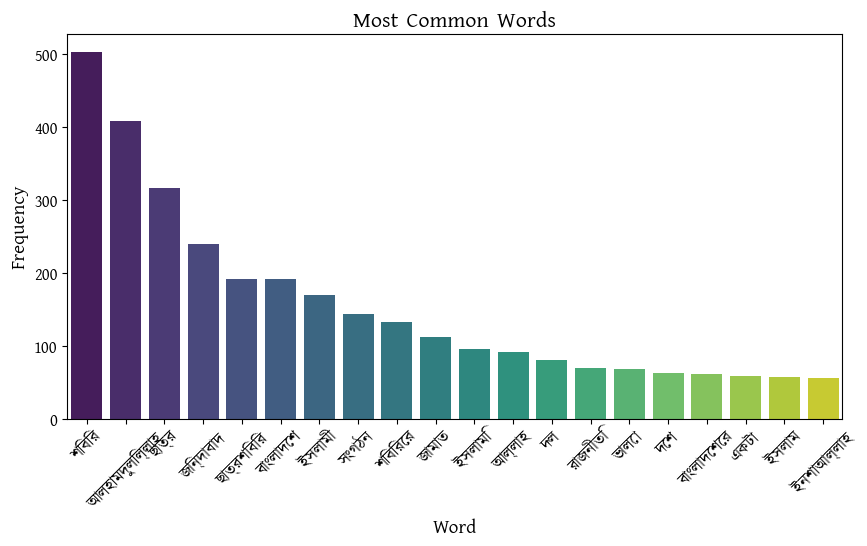

In [21]:
bangla_font_prop = font_manager.FontProperties(fname=bangla_font_path)
plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='viridis')
plt.title('Most Common Words', fontproperties=bangla_font_prop, fontsize=16)
plt.xlabel('Word', fontproperties=bangla_font_prop, fontsize=14)
plt.ylabel('Frequency', fontproperties=bangla_font_prop, fontsize=14)
plt.xticks(rotation=45, fontproperties=bangla_font_prop, fontsize=12)
plt.yticks(fontproperties=bangla_font_prop, fontsize=12)
plt.show()

# 5. Improving dataset problems

#### Import things

In [22]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

#### Check for missing values

In [23]:
missing_values = df.isnull().sum() 
print("Missing Values:\n", missing_values)

Missing Values:
 ID              0
Text            0
Label           0
Text_length     0
word_count      0
Cleaned_Text    0
dtype: int64


#### Visualize missing values using a heatmap

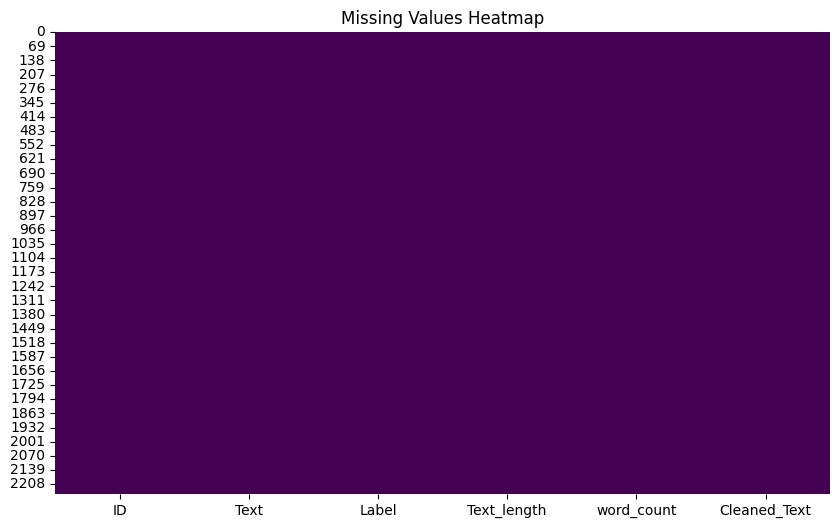

In [24]:
plt.rcParams['font.family'] = 'sans-serif'
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show() # kono missing values na thakay kichui show korbena

#### Check for class imbalance

In [25]:
class_distribution = df['Label'].value_counts() 
print("Class Distribution:\n", class_distribution)

Class Distribution:
 Label
1    1708
0     410
2     140
Name: count, dtype: int64


#### Visualize class distribution

C:\Users\MSI\AppData\Local\Temp\ipykernel_17400\891507153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


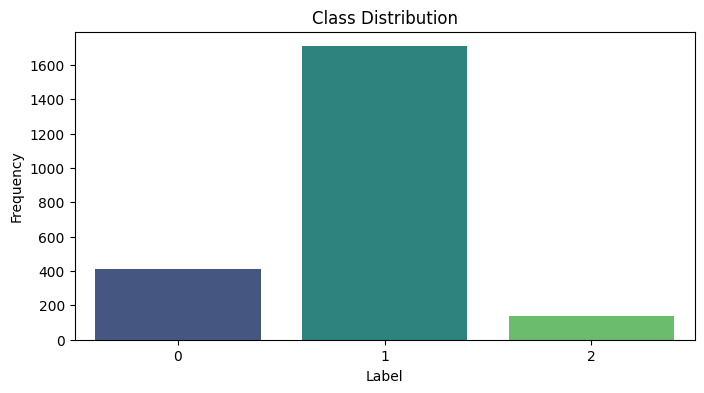

In [26]:
plt.figure(figsize=(8, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

#### Handle class imbalance (By Resampling Techniques)

In [27]:
df_majority = df[df['Label'] == 1]
df_minority_0 = df[df['Label'] == 0]
df_minority_2 = df[df['Label'] == 2]

# Upsample minority class 0
df_minority_0_upsampled = resample(df_minority_0, 
                                    replace=True,    
                                    n_samples=len(df_majority), 
                                    random_state=123)

# Upsample minority class 2
df_minority_2_upsampled = resample(df_minority_2, 
                                    replace=True,    
                                    n_samples=len(df_majority), 
                                    random_state=123)

# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([df_majority, df_minority_0_upsampled, df_minority_2_upsampled])

print(df_upsampled['Label'].value_counts())


Label
1    1708
0    1708
2    1708
Name: count, dtype: int64


#### Visualize new class distribution

C:\Users\MSI\AppData\Local\Temp\ipykernel_17400\729348846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_upsampled['Label'].value_counts().index,


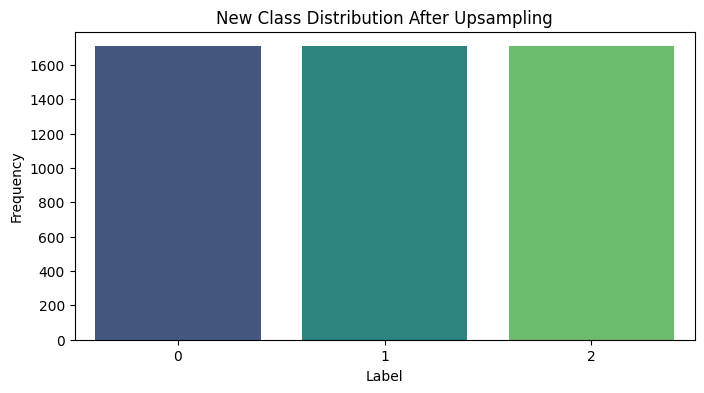

In [28]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df_upsampled['Label'].value_counts().index, 
            y=df_upsampled['Label'].value_counts().values, 
            palette='viridis')
plt.title('New Class Distribution After Upsampling')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# 6. Sentiment Analysis Model

#### Import things

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout

#### Vectorizing the text data and splitting into train-test set

In [30]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Text']).toarray()
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression Model

In [31]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.66      0.38      0.48        82
           1       0.79      0.97      0.87       331
           2       0.00      0.00      0.00        39

    accuracy                           0.78       452
   macro avg       0.48      0.45      0.45       452
weighted avg       0.70      0.78      0.72       452



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Support Vector Machine Model

In [32]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.68      0.33      0.44        82
           1       0.78      0.97      0.86       331
           2       0.00      0.00      0.00        39

    accuracy                           0.77       452
   macro avg       0.48      0.43      0.44       452
weighted avg       0.69      0.77      0.71       452



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Naive Bayes Model

In [33]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Naive Bayes:
               precision    recall  f1-score   support

           0       0.81      0.16      0.27        82
           1       0.75      0.99      0.86       331
           2       0.00      0.00      0.00        39

    accuracy                           0.76       452
   macro avg       0.52      0.38      0.37       452
weighted avg       0.70      0.76      0.68       452



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Random Forest Model

In [34]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.61      0.43      0.50        82
           1       0.80      0.95      0.87       331
           2       0.00      0.00      0.00        39

    accuracy                           0.77       452
   macro avg       0.47      0.46      0.46       452
weighted avg       0.70      0.77      0.73       452



#### Tokenizer and Padding for neural networks

In [35]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Cleaned_Text'])
X_seq = tokenizer.texts_to_sequences(df['Cleaned_Text'])
X_padded = pad_sequences(X_seq, maxlen=100, padding='post', truncating='post')

#### Build LSTM model


In [36]:
embedding_dim = 128
lstm_model = Sequential()
lstm_model.add(Embedding(5000, embedding_dim, input_length=100))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)

y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")
print("LSTM Model:\n", classification_report(y_test, y_pred_lstm))

c:\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
57/57 - 95s - 2s/step - accuracy: 0.7625 - loss: 0.3974 - val_accuracy: 0.7323 - val_loss: 0.3279
Epoch 2/5
57/57 - 48s - 838ms/step - accuracy: 0.7625 - loss: 0.3839 - val_accuracy: 0.7323 - val_loss: 0.3462
Epoch 3/5
57/57 - 82s - 1s/step - accuracy: 0.7625 - loss: 0.3855 - val_accuracy: 0.7323 - val_loss: 0.3249
Epoch 4/5
57/57 - 82s - 1s/step - accuracy: 0.7625 - loss: 0.3841 - val_accuracy: 0.7323 - val_loss: 0.3202
Epoch 5/5
57/57 - 82s - 1s/step - accuracy: 0.7625 - loss: 0.3812 - val_accuracy: 0.7323 - val_loss: 0.3183
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 511ms/step
LSTM Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.73      1.00      0.85       331
           2       0.00      0.00      0.00        39

    accuracy                           0.73       452
   macro avg       0.24      0.33      0.28       452
weighted avg       0.54      0.73      0.62       452



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Build Dense model

In [37]:
from tensorflow.keras.layers import Flatten

dense_model = Sequential()
dense_model.add(Embedding(5000, embedding_dim, input_length=100))
dense_model.add(SpatialDropout1D(0.2))
dense_model.add(Flatten())  
dense_model.add(Dense(128, activation='relu'))
dense_model.add(Dropout(0.5))
dense_model.add(Dense(64, activation='relu'))
dense_model.add(Dense(1, activation='sigmoid'))

dense_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

dense_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)
y_pred_dense = (dense_model.predict(X_test) > 0.5).astype("int32")

print("Dense Model:\n", classification_report(y_test, y_pred_dense))

c:\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
57/57 - 25s - 446ms/step - accuracy: 0.6960 - loss: 1.0710 - val_accuracy: 0.1814 - val_loss: 0.7163
Epoch 2/5
57/57 - 14s - 251ms/step - accuracy: 0.7342 - loss: 0.5659 - val_accuracy: 0.7323 - val_loss: 0.5512
Epoch 3/5
57/57 - 15s - 256ms/step - accuracy: 0.7625 - loss: 0.5254 - val_accuracy: 0.7323 - val_loss: 0.4551
Epoch 4/5
57/57 - 13s - 234ms/step - accuracy: 0.7597 - loss: 0.4530 - val_accuracy: 0.7323 - val_loss: 0.4506
Epoch 5/5
57/57 - 13s - 230ms/step - accuracy: 0.7625 - loss: 0.4272 - val_accuracy: 0.7323 - val_loss: 0.5095
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Dense Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.73      1.00      0.85       331
           2       0.00      0.00      0.00        39

    accuracy                           0.73       452
   macro avg       0.24      0.33      0.28       452
weighted avg       0.54      0.73      0.62       452



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Saving models and vectorizer

In [42]:
import pickle

models = {
    'logistic_regression': lr_model,
    'svm': svm_model,
    'naive_bayes': nb_model,
    'random_forest': rf_model,
    'lstm': lstm_model
}
for model_name, model in models.items(): # Save each model
    with open(f'{model_name}_model.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)
 
with open('vectorizer.pkl', 'wb') as vectorizer_file: # Save the fitted vectorizer
    pickle.dump(tfidf, vectorizer_file) 
